In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data for Peter Temin's Figure 6.2

In [2]:
pd.read_csv('data_pt.csv')

,Region,Distance (km) from Rome,Rome Price (HS),Province Price (HS),"Distance-from-Rome ""Discount"" (HS)",Year
0,Sicily (Sicilia province),427,4.00 HS,2-3 HS,-1.50,77 BC
1,Spain (Lusitania province),1363,3.00-4.00 HS,1 HS,-2.50,150 BC
2,"Italy (Italia province), by River",1510,3.00-4.00 HS,0.5 HS,-3.00,150 BC
3,Asia Minor (city of Psidian Antioch),1724,5.00-6.00 HS,2.00-2.25 HS,-3.13,80s
4,Egypt (Region of the Fayum),1953,5.00-6.00 HS,1.5 HS,-4.00,20 BC - AD 56
5,Palestine,2298,5.00-6.00 HS,2.00-2.50 HS,-3.25,15 AD


# Data for plot (Richard Saller and Peter Temin)

In [3]:
df = pd.read_csv('data.csv')
df

,Region (RS),Region (PT),"Transportation cost to Rome, sesterces per kg of wheat",Distance (km) from Rome,"Distance-from-Rome ""Discount"" (HS)"
0,Palermo (Sicily),Sicily (Sicilia province),0.98,427,-1.50
1,Madrid (not actually in Lusitania),Spain (Lusitania province),7.74,1363,-2.50
2,Po Valley,"Italy (Italia province), by River",2.28,1510,-3.00
3,Turkey (Pisidian Antioch),Asia Minor (city of Psidian Antioch),10.13,1724,-3.13
4,Egypt (Fayum),Egypt (Region of the Fayum),4.34,1953,-4.00
5,Palestine,Palestine,5.33,2298,-3.25


# Plot parameters

Almost every aspect of the plots can be adjusted-- font sizes, colors, marker styles, plot dimensions, etc.

In [4]:
shift = 0.1
rs_color = 'xkcd:red' # see all color choices here: https://xkcd.com/color/rgb/
pt_color = 'xkcd:black'

# Plots

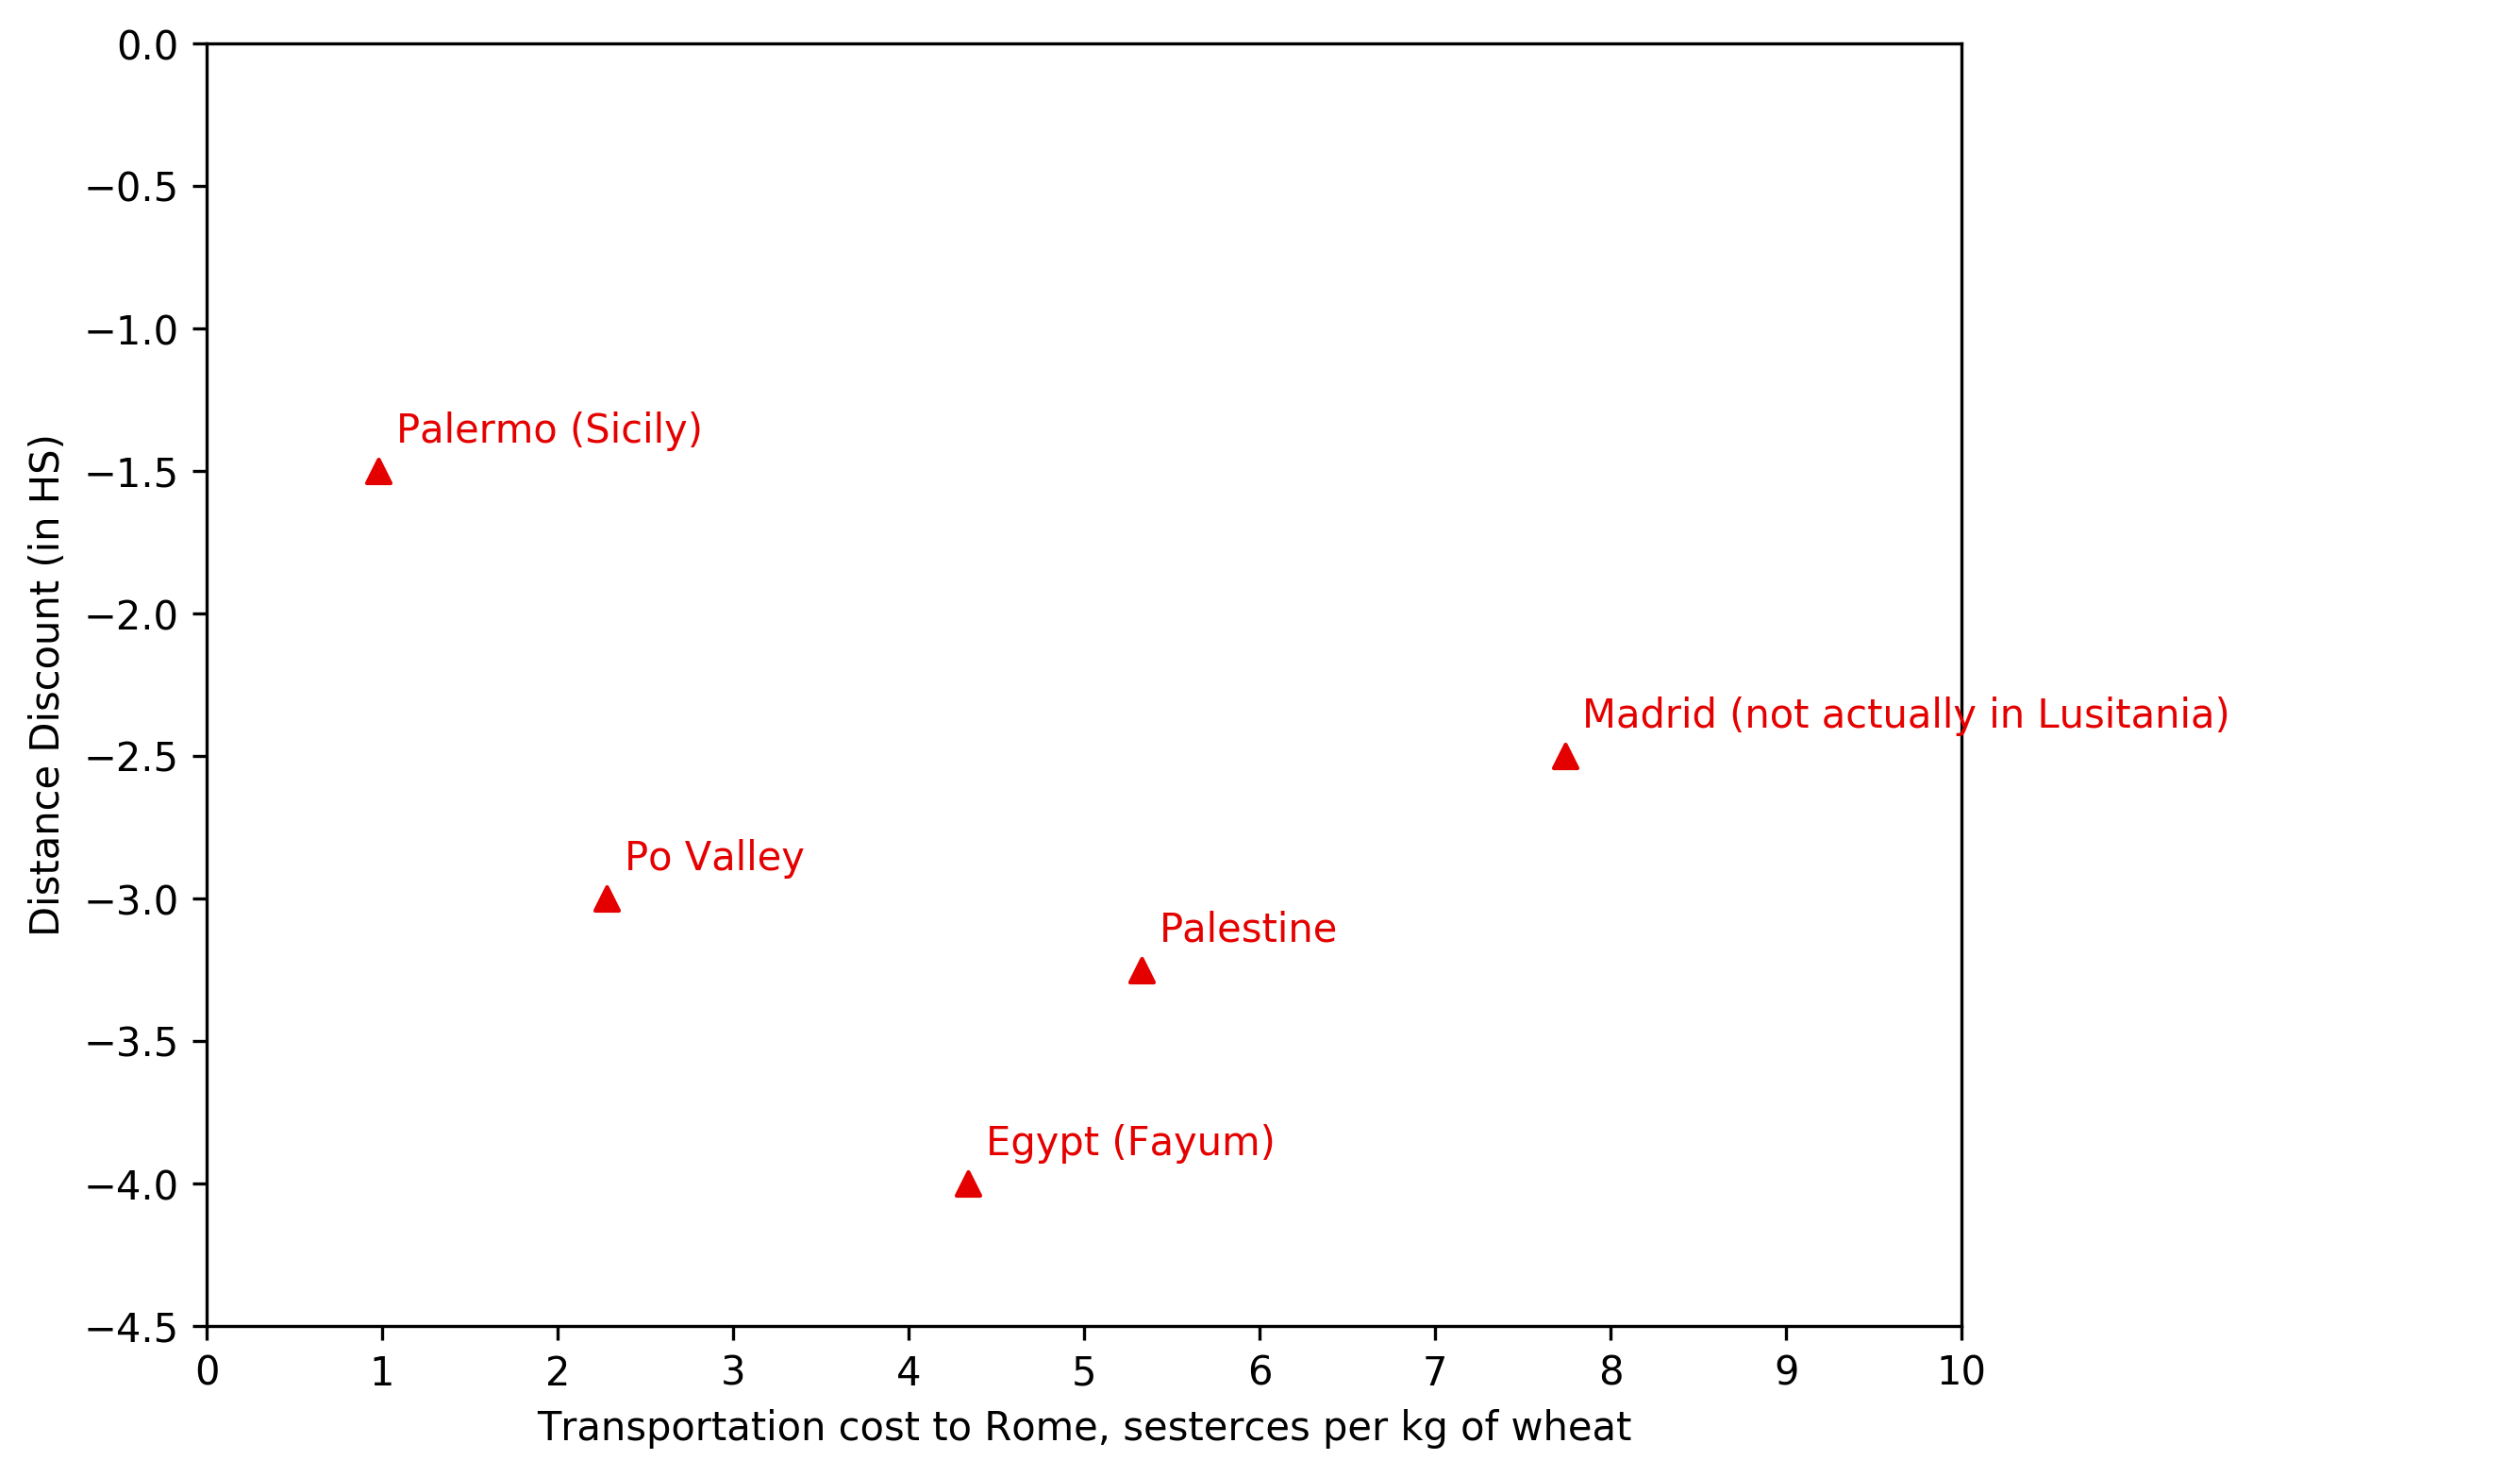

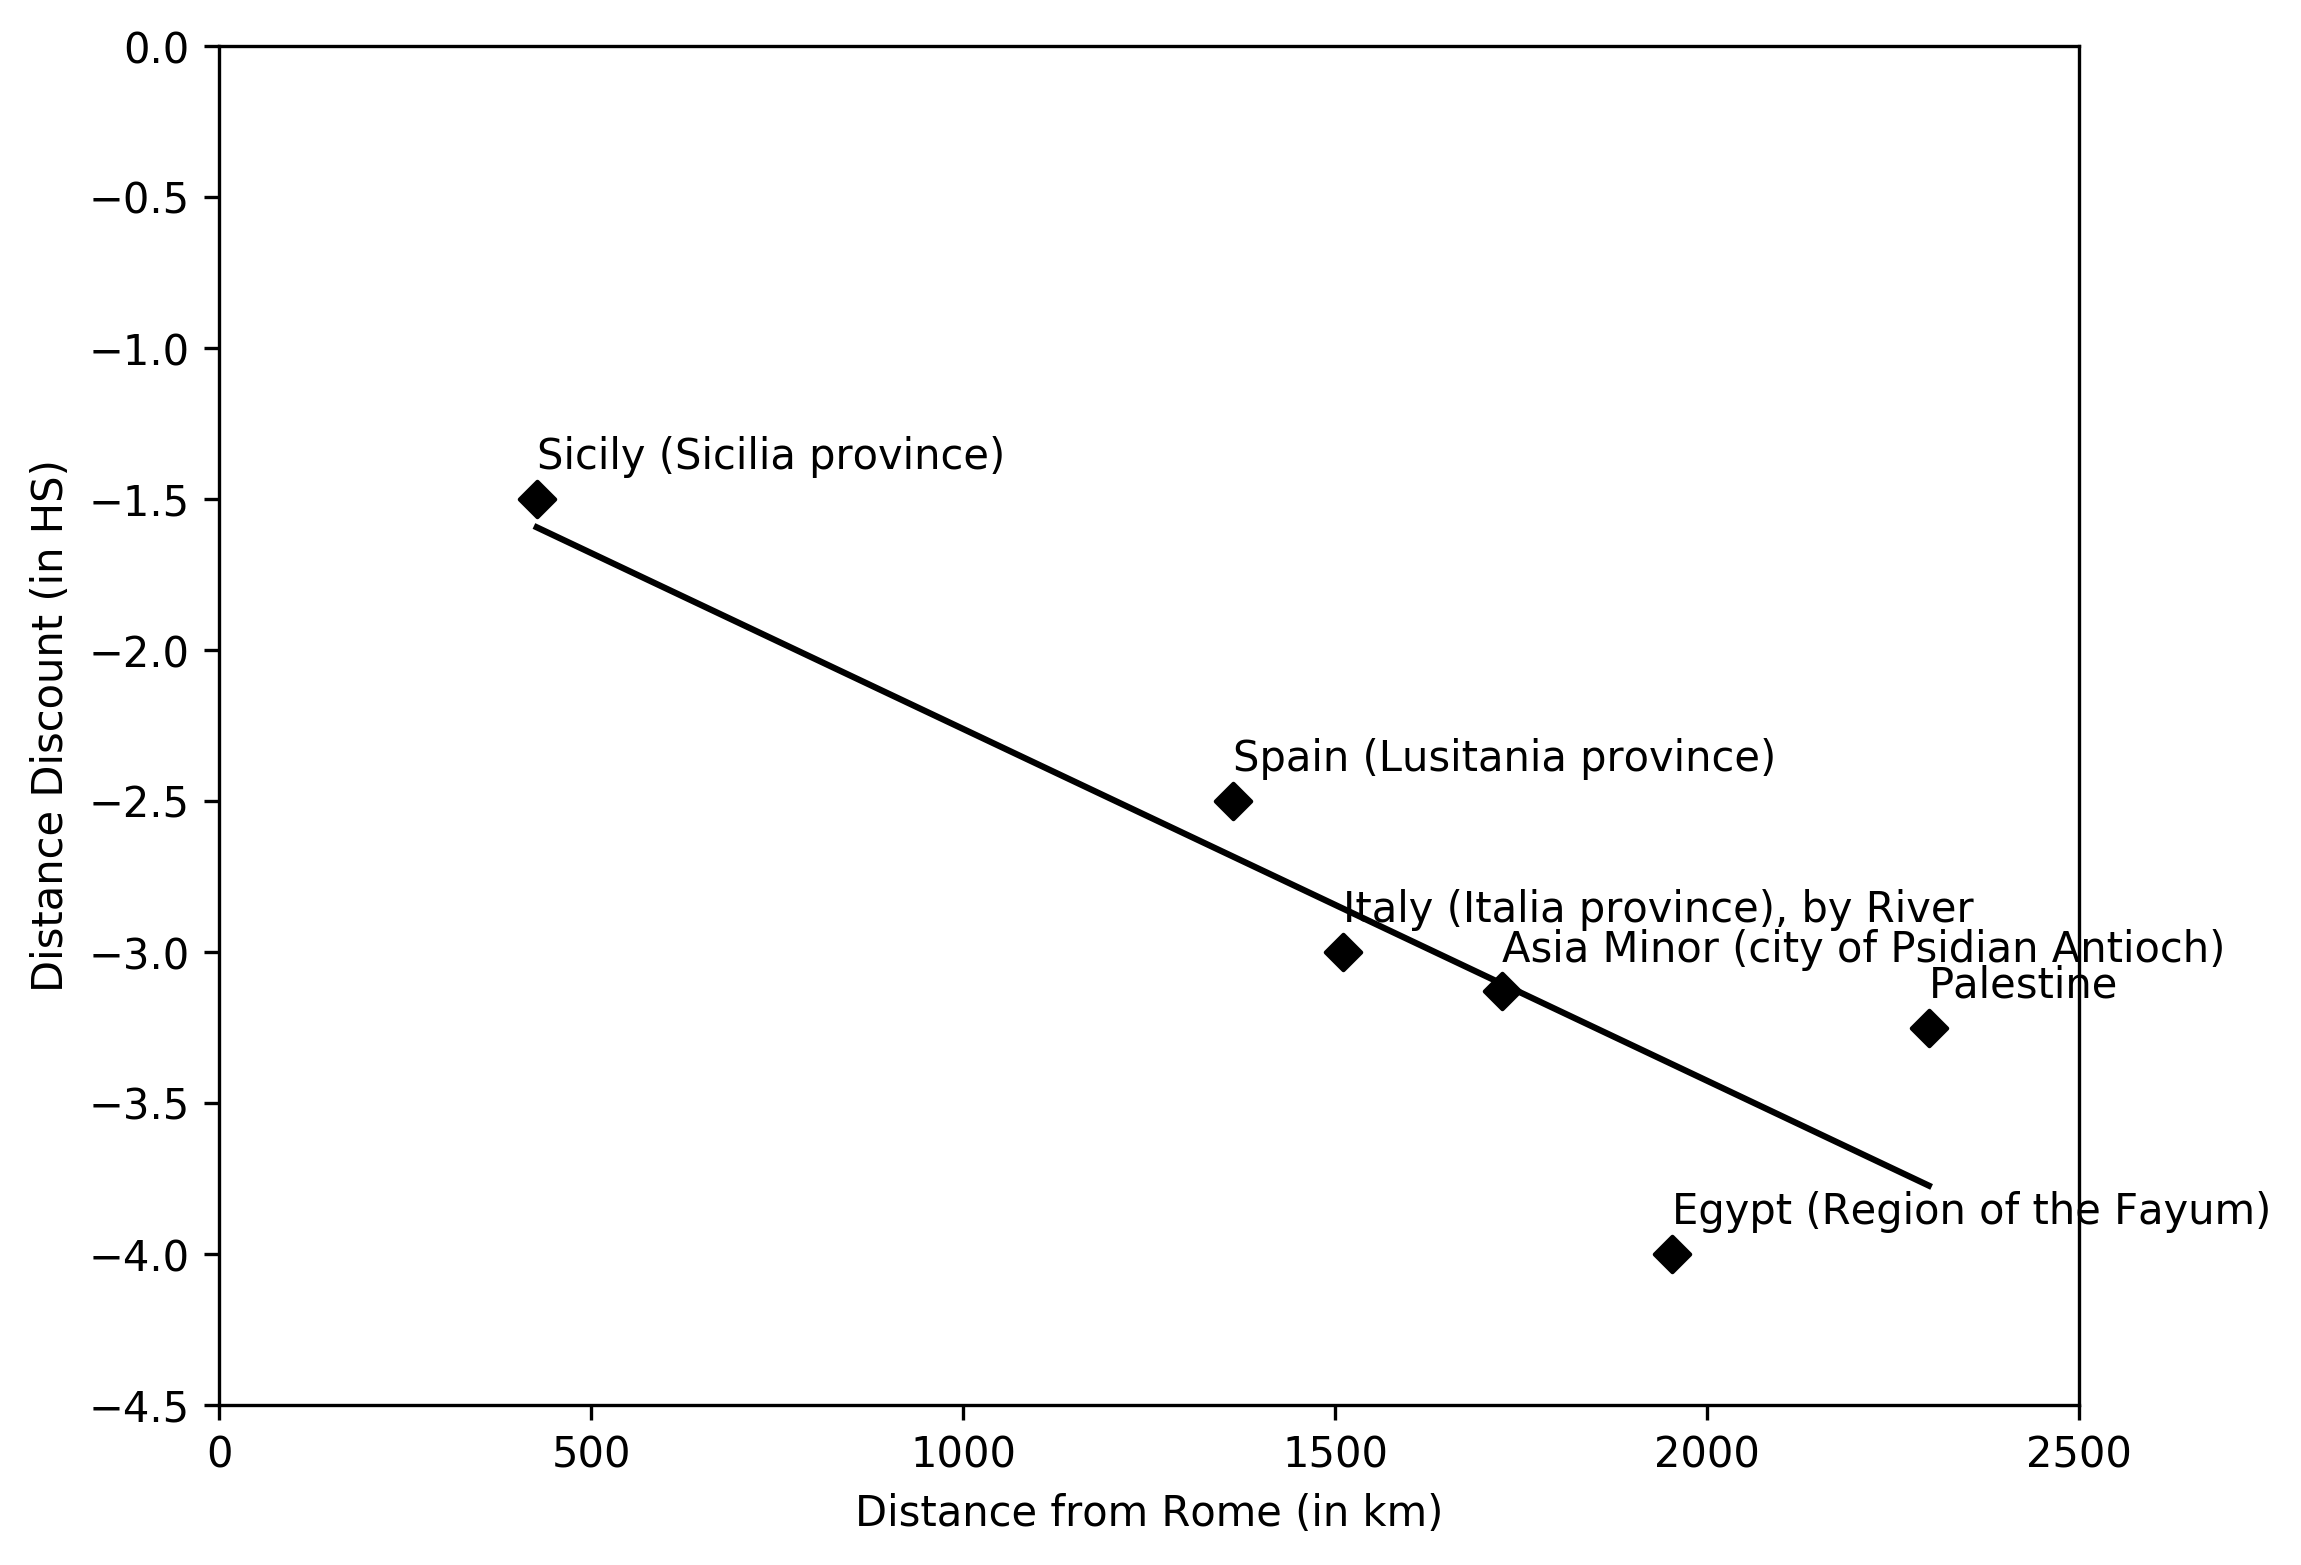

In [5]:
x_rs = df['Transportation cost to Rome, sesterces per kg of wheat']
x_pt = df['Distance (km) from Rome']
y_rs_pt = df['Distance-from-Rome "Discount" (HS)']

# plot RS data
plt.figure(dpi=300, figsize=(8,6))
plt.scatter(x_rs, y_rs_pt, facecolor=rs_color, marker='^')
for label, x, y in zip(df['Region (RS)'], x_rs, y_rs_pt):
    plt.annotate(label, (x+shift, y+shift), color=rs_color)
plt.xticks(np.arange(0, 11, 1))
plt.xlabel('Transportation cost to Rome, sesterces per kg of wheat')
plt.ylabel('Distance Discount (in HS)')
plt.xlim(0,10)
plt.ylim(-4.5, 0)
plt.show()

# plot PT data
plt.figure(dpi=300, figsize=(8,6))
plt.scatter(x_pt, y_rs_pt, facecolor=pt_color, marker='D')
for label, x, y in zip(df['Region (PT)'], x_pt, y_rs_pt):
    plt.annotate(label, (x+shift, y+shift), color=pt_color)
m, b = np.polyfit(x_pt, y_rs_pt, 1)
plt.plot(x_pt, m*x_pt+b, color='xkcd:black')
plt.xlabel('Distance from Rome (in km)')
plt.xticks(np.arange(0, 2501, 500))
plt.ylabel('Distance Discount (in HS)')
plt.ylim(-4.5, 0)
plt.show()

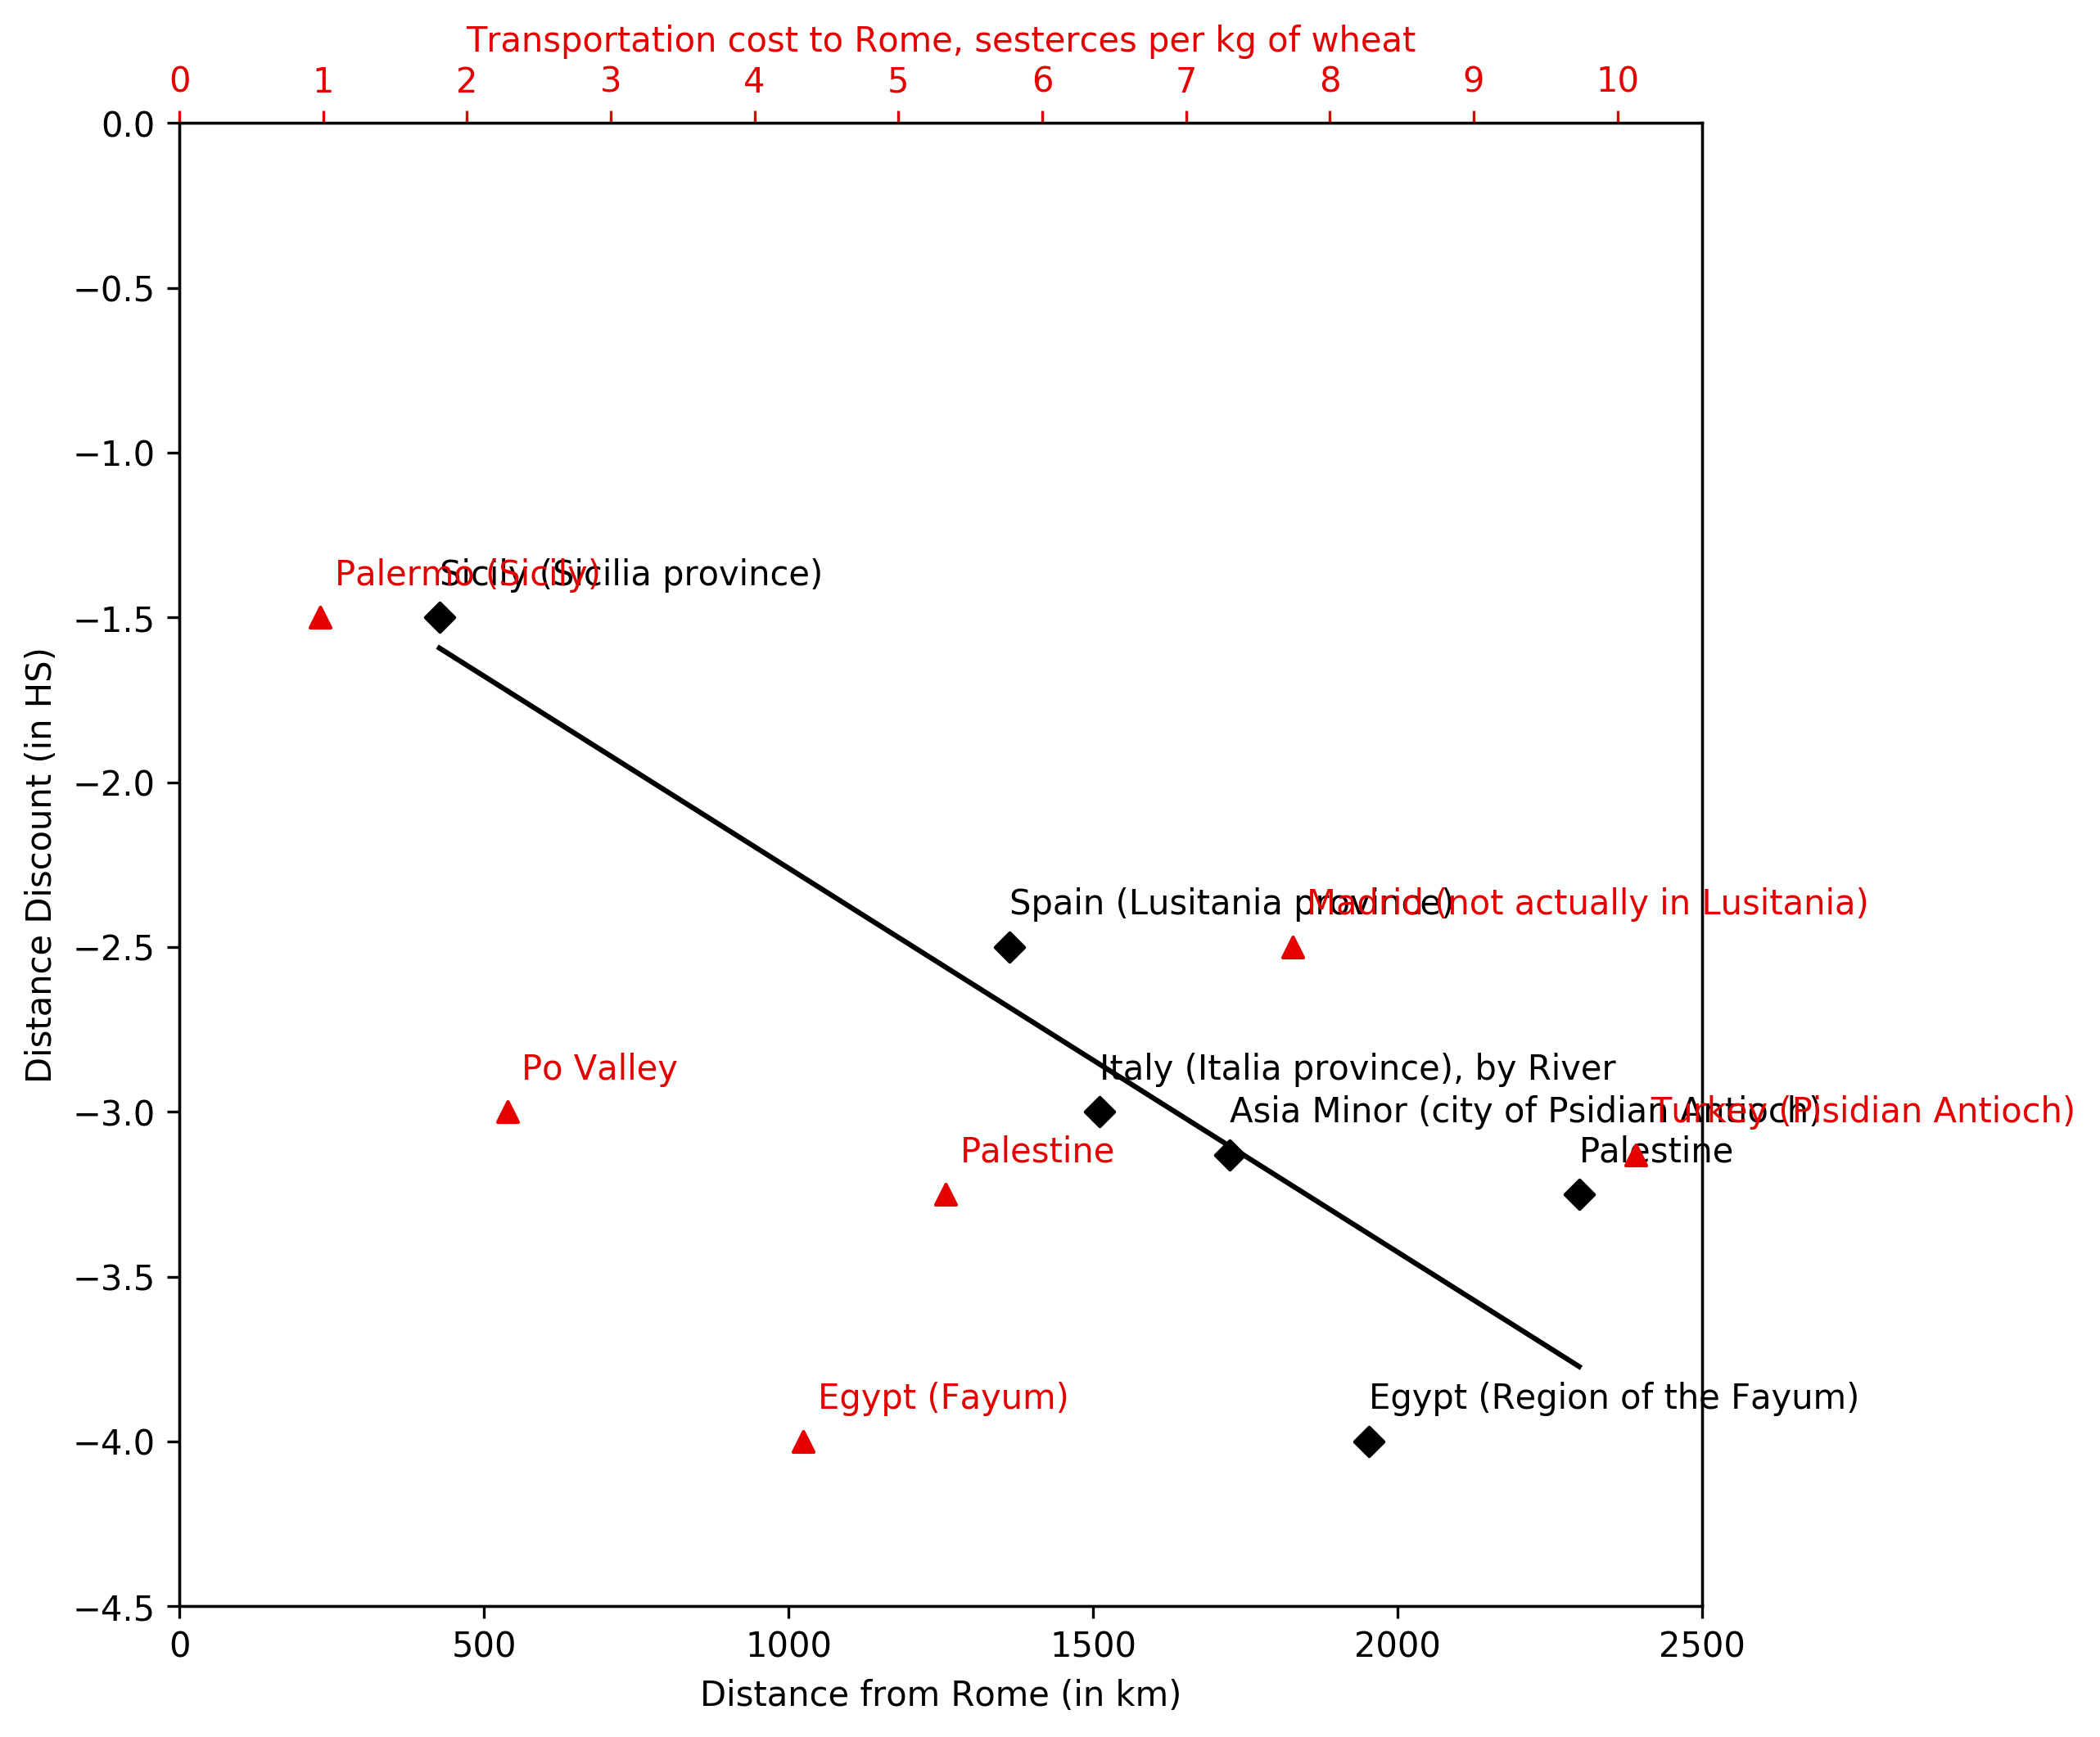

In [6]:
x_rs = df['Transportation cost to Rome, sesterces per kg of wheat']
x_pt = df['Distance (km) from Rome']
y_rs_pt = df['Distance-from-Rome "Discount" (HS)']

plt.figure(dpi=300, figsize=(8,8))
ax2 = plt.subplot()

# plot PT data
l2 = ax2.scatter(x_pt, y_rs_pt, facecolor=pt_color, marker='D')
for label, x, y in zip(df['Region (PT)'], x_pt, y_rs_pt):
    ax2.annotate(label, (x+shift, y+shift), color=pt_color)
m, b = np.polyfit(x_pt, y_rs_pt, 1)
plt.plot(x_pt, m*x_pt+b, color=pt_color)
ax2.set_xlabel('Distance from Rome (in km)')
ax2.tick_params(axis='x', colors=pt_color)
ax2.set_xticks(np.arange(0, 2501, 500))
ax2.set_ylabel('Distance Discount (in HS)')

# plot RS data
ax1 = ax2.twiny()
l1 = ax1.scatter(x_rs, y_rs_pt, facecolor=rs_color, marker='^')
for label, x, y in zip(df['Region (RS)'], x_rs, y_rs_pt):
    ax1.annotate(label, (x+shift, y+shift), color=rs_color)
ax1.set_xlabel('Transportation cost to Rome, sesterces per kg of wheat', color=rs_color)
ax1.tick_params(axis='x', colors=rs_color)
ax1.set_xticks(np.arange(0, 11, 1))

plt.ylim(-4.5, 0)
plt.show()

## Problem: Labels overlap

An issue with the plot is that the labels overlap each other.

## Solution 1: Assign each region a different color or shape

One option assigning a different shape to each region. E.g., Palermo transportation cost is a red triangle, Palermo distance is a black triangle, Po Valley transportation cost is a red square, and Po Valley distance is a black square, etc.

Alternatively, we could represent all the RS datapoints as triangles (or some other shape) and all the PT datapoints as diamonds (or some other shape) and assigning each region a different color. E.g., Palermo transportation cost is a red triangle, Palermo distance is a red diamond, Po Valley transportation cost is an orange triangle, and Po Valley distance is an orange diamond, etc. We could then include a legend next to the plot with 12 markers for the 12 different combinations. 

If we go with this option, you can select which of these colors (https://xkcd.com/color/rgb/) and marker shapes (https://matplotlib.org/stable/api/markers_api.html) you would like to assign to the different regions and datasets.

## Solution 2: Rotate the region labels

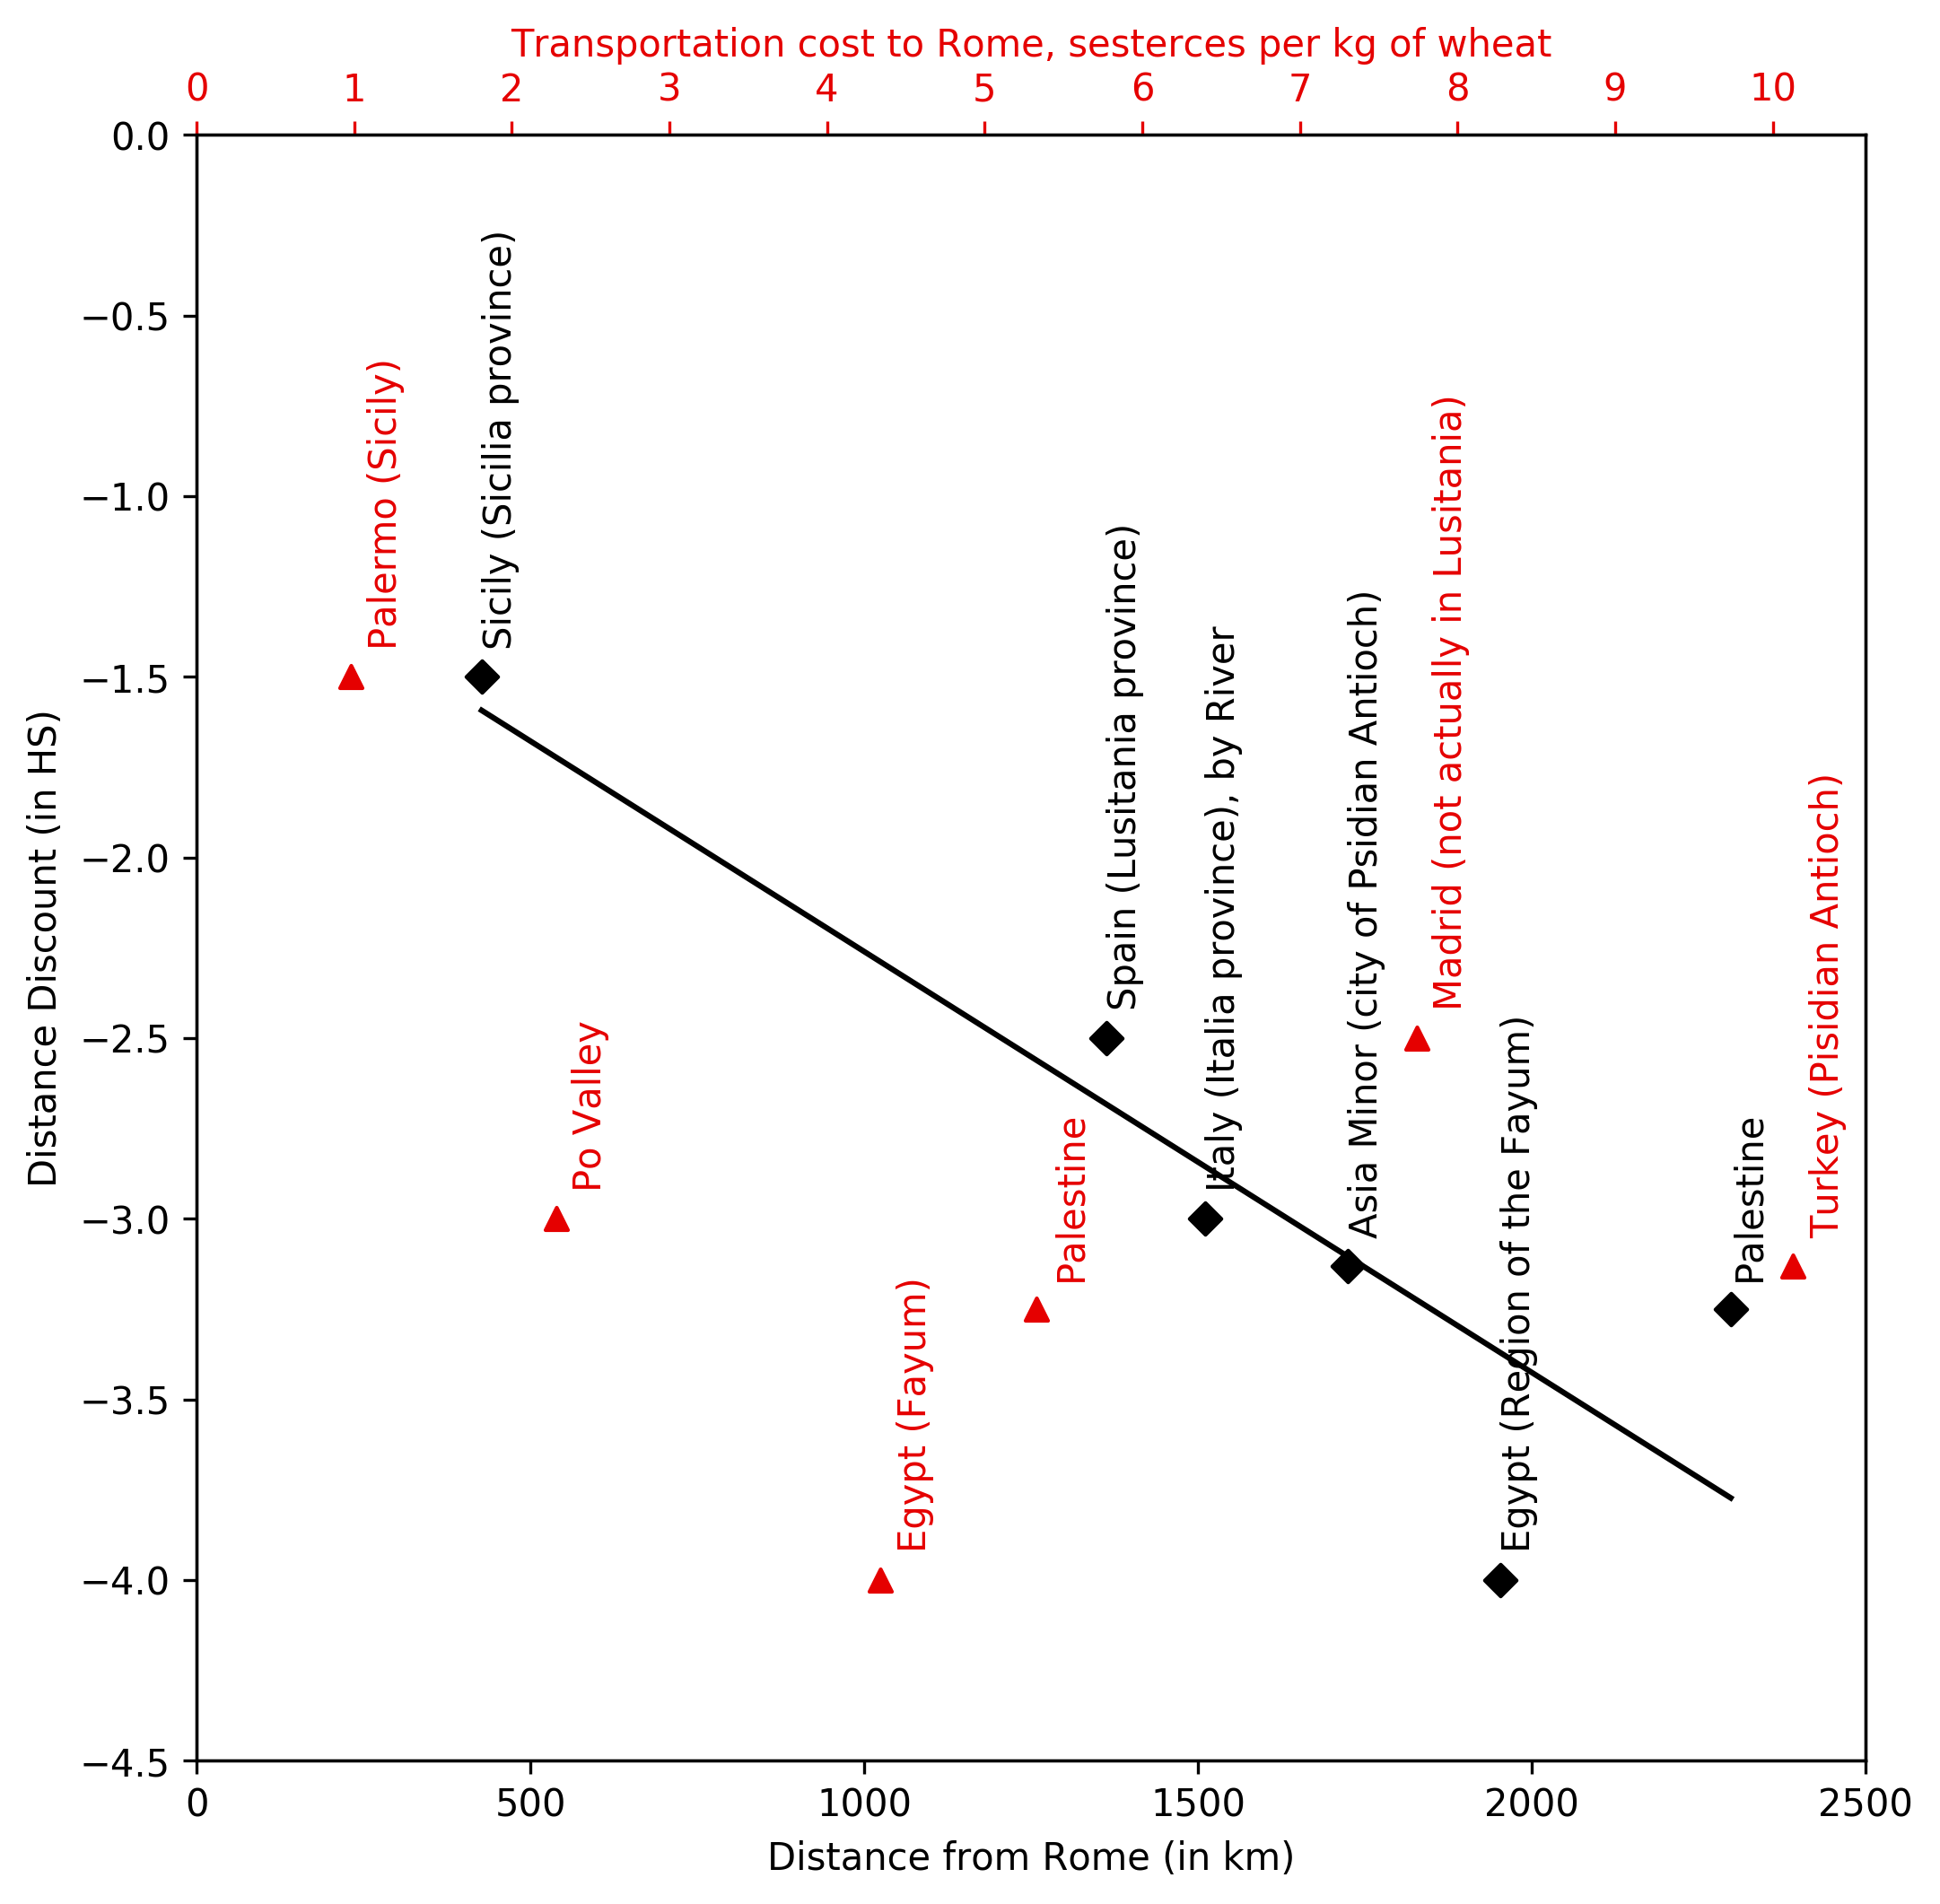

In [7]:
x_rs = df['Transportation cost to Rome, sesterces per kg of wheat']
x_pt = df['Distance (km) from Rome']
y_rs_pt = df['Distance-from-Rome "Discount" (HS)']

plt.figure(dpi=300, figsize=(8,8))
ax2 = plt.subplot()

# plot PT data
l2 = ax2.scatter(x_pt, y_rs_pt, facecolor=pt_color, marker='D')
for label, x, y in zip(df['Region (PT)'], x_pt, y_rs_pt):
    ax2.annotate(label, (x+shift, y+shift), color=pt_color, rotation=90)
m, b = np.polyfit(x_pt, y_rs_pt, 1)
plt.plot(x_pt, m*x_pt+b, color=pt_color)
ax2.set_xlabel('Distance from Rome (in km)')
ax2.tick_params(axis='x', colors=pt_color)
ax2.set_xticks(np.arange(0, 2501, 500))
ax2.set_ylabel('Distance Discount (in HS)')

# plot RS data
ax1 = ax2.twiny()
l1 = ax1.scatter(x_rs, y_rs_pt, facecolor=rs_color, marker='^')
for label, x, y in zip(df['Region (RS)'], x_rs, y_rs_pt):
    ax1.annotate(label, (x+shift, y+shift), color=rs_color, rotation=90)
ax1.set_xlabel('Transportation cost to Rome, sesterces per kg of wheat', color=rs_color)
ax1.tick_params(axis='x', colors=rs_color)
ax1.set_xticks(np.arange(0, 11, 1))

plt.ylim(-4.5, 0)
plt.show()

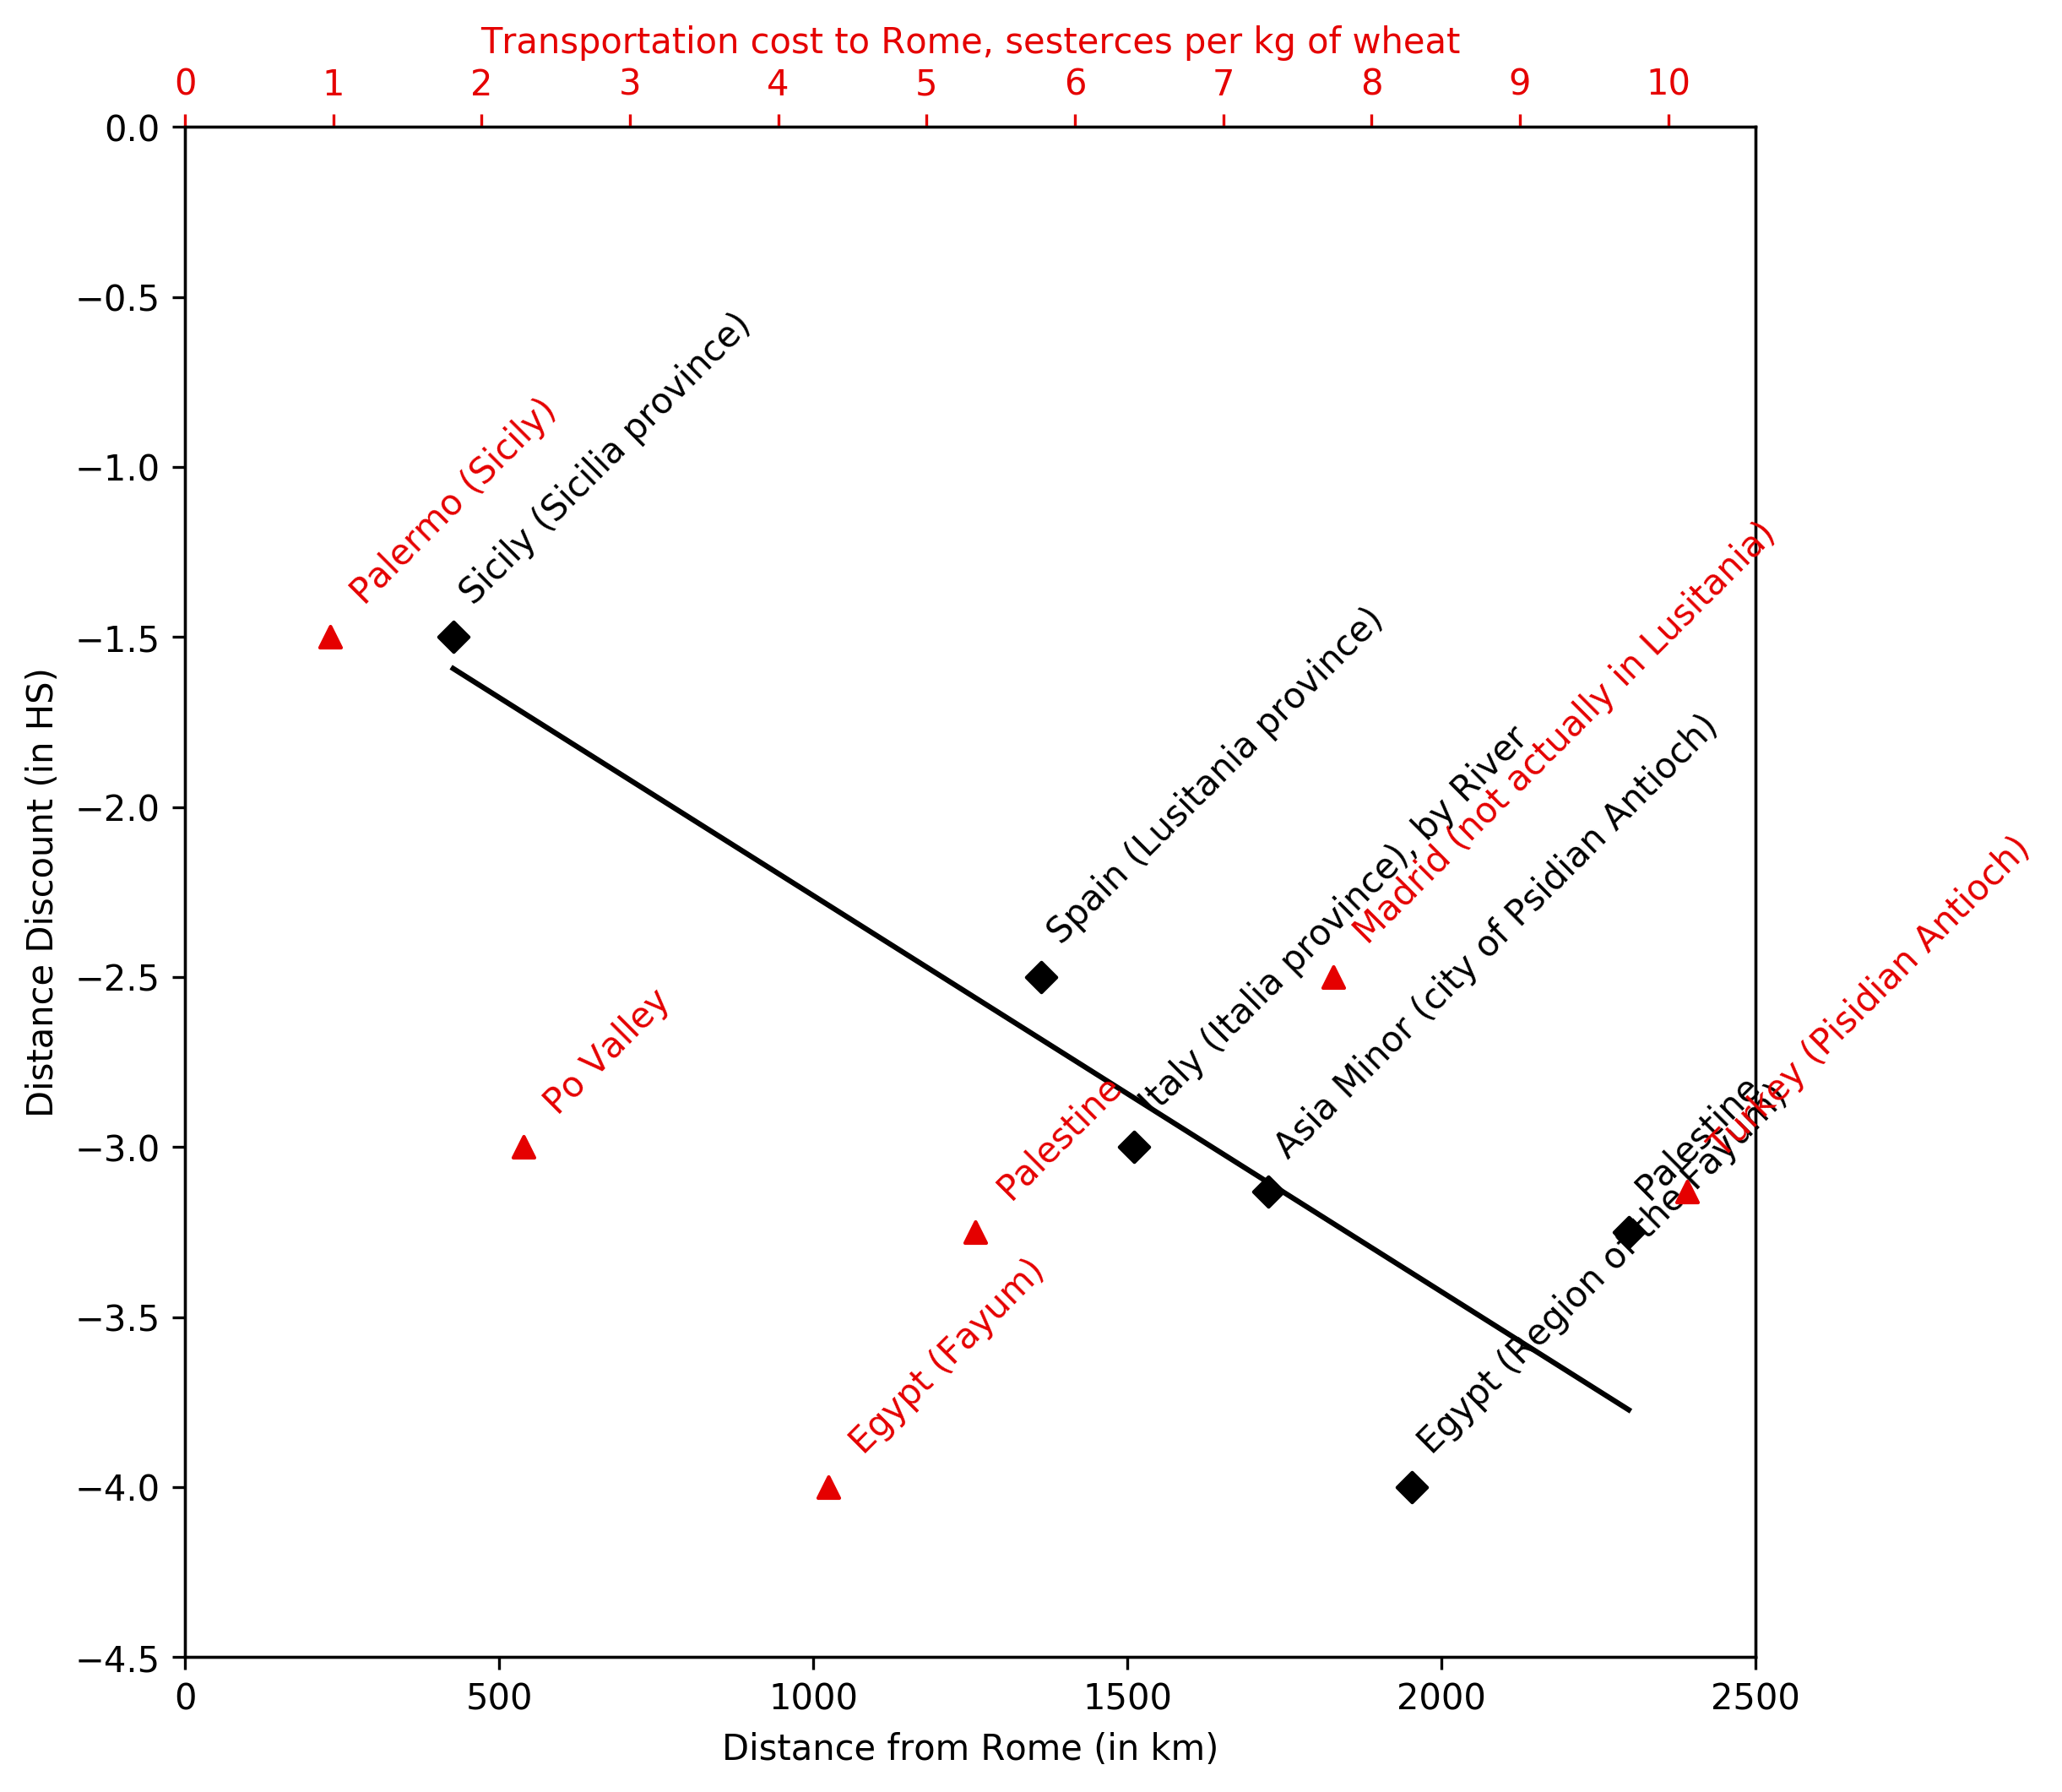

In [8]:
x_rs = df['Transportation cost to Rome, sesterces per kg of wheat']
x_pt = df['Distance (km) from Rome']
y_rs_pt = df['Distance-from-Rome "Discount" (HS)']

plt.figure(dpi=300, figsize=(8,8))
ax2 = plt.subplot()

# plot PT data
l2 = ax2.scatter(x_pt, y_rs_pt, facecolor=pt_color, marker='D')
for label, x, y in zip(df['Region (PT)'], x_pt, y_rs_pt):
    ax2.annotate(label, (x+shift, y+shift), color=pt_color, rotation=45)
m, b = np.polyfit(x_pt, y_rs_pt, 1)
plt.plot(x_pt, m*x_pt+b, color=pt_color)
ax2.set_xlabel('Distance from Rome (in km)')
ax2.tick_params(axis='x', colors=pt_color)
ax2.set_xticks(np.arange(0, 2501, 500))
ax2.set_ylabel('Distance Discount (in HS)')

# plot RS data
ax1 = ax2.twiny()
l1 = ax1.scatter(x_rs, y_rs_pt, facecolor=rs_color, marker='^')
for label, x, y in zip(df['Region (RS)'], x_rs, y_rs_pt):
    ax1.annotate(label, (x+shift, y+shift), color=rs_color, rotation=45)
ax1.set_xlabel('Transportation cost to Rome, sesterces per kg of wheat', color=rs_color)
ax1.tick_params(axis='x', colors=rs_color)
ax1.set_xticks(np.arange(0, 11, 1))

plt.ylim(-4.5, 0)
plt.show()

## Solution 3: Switch the x and y axes

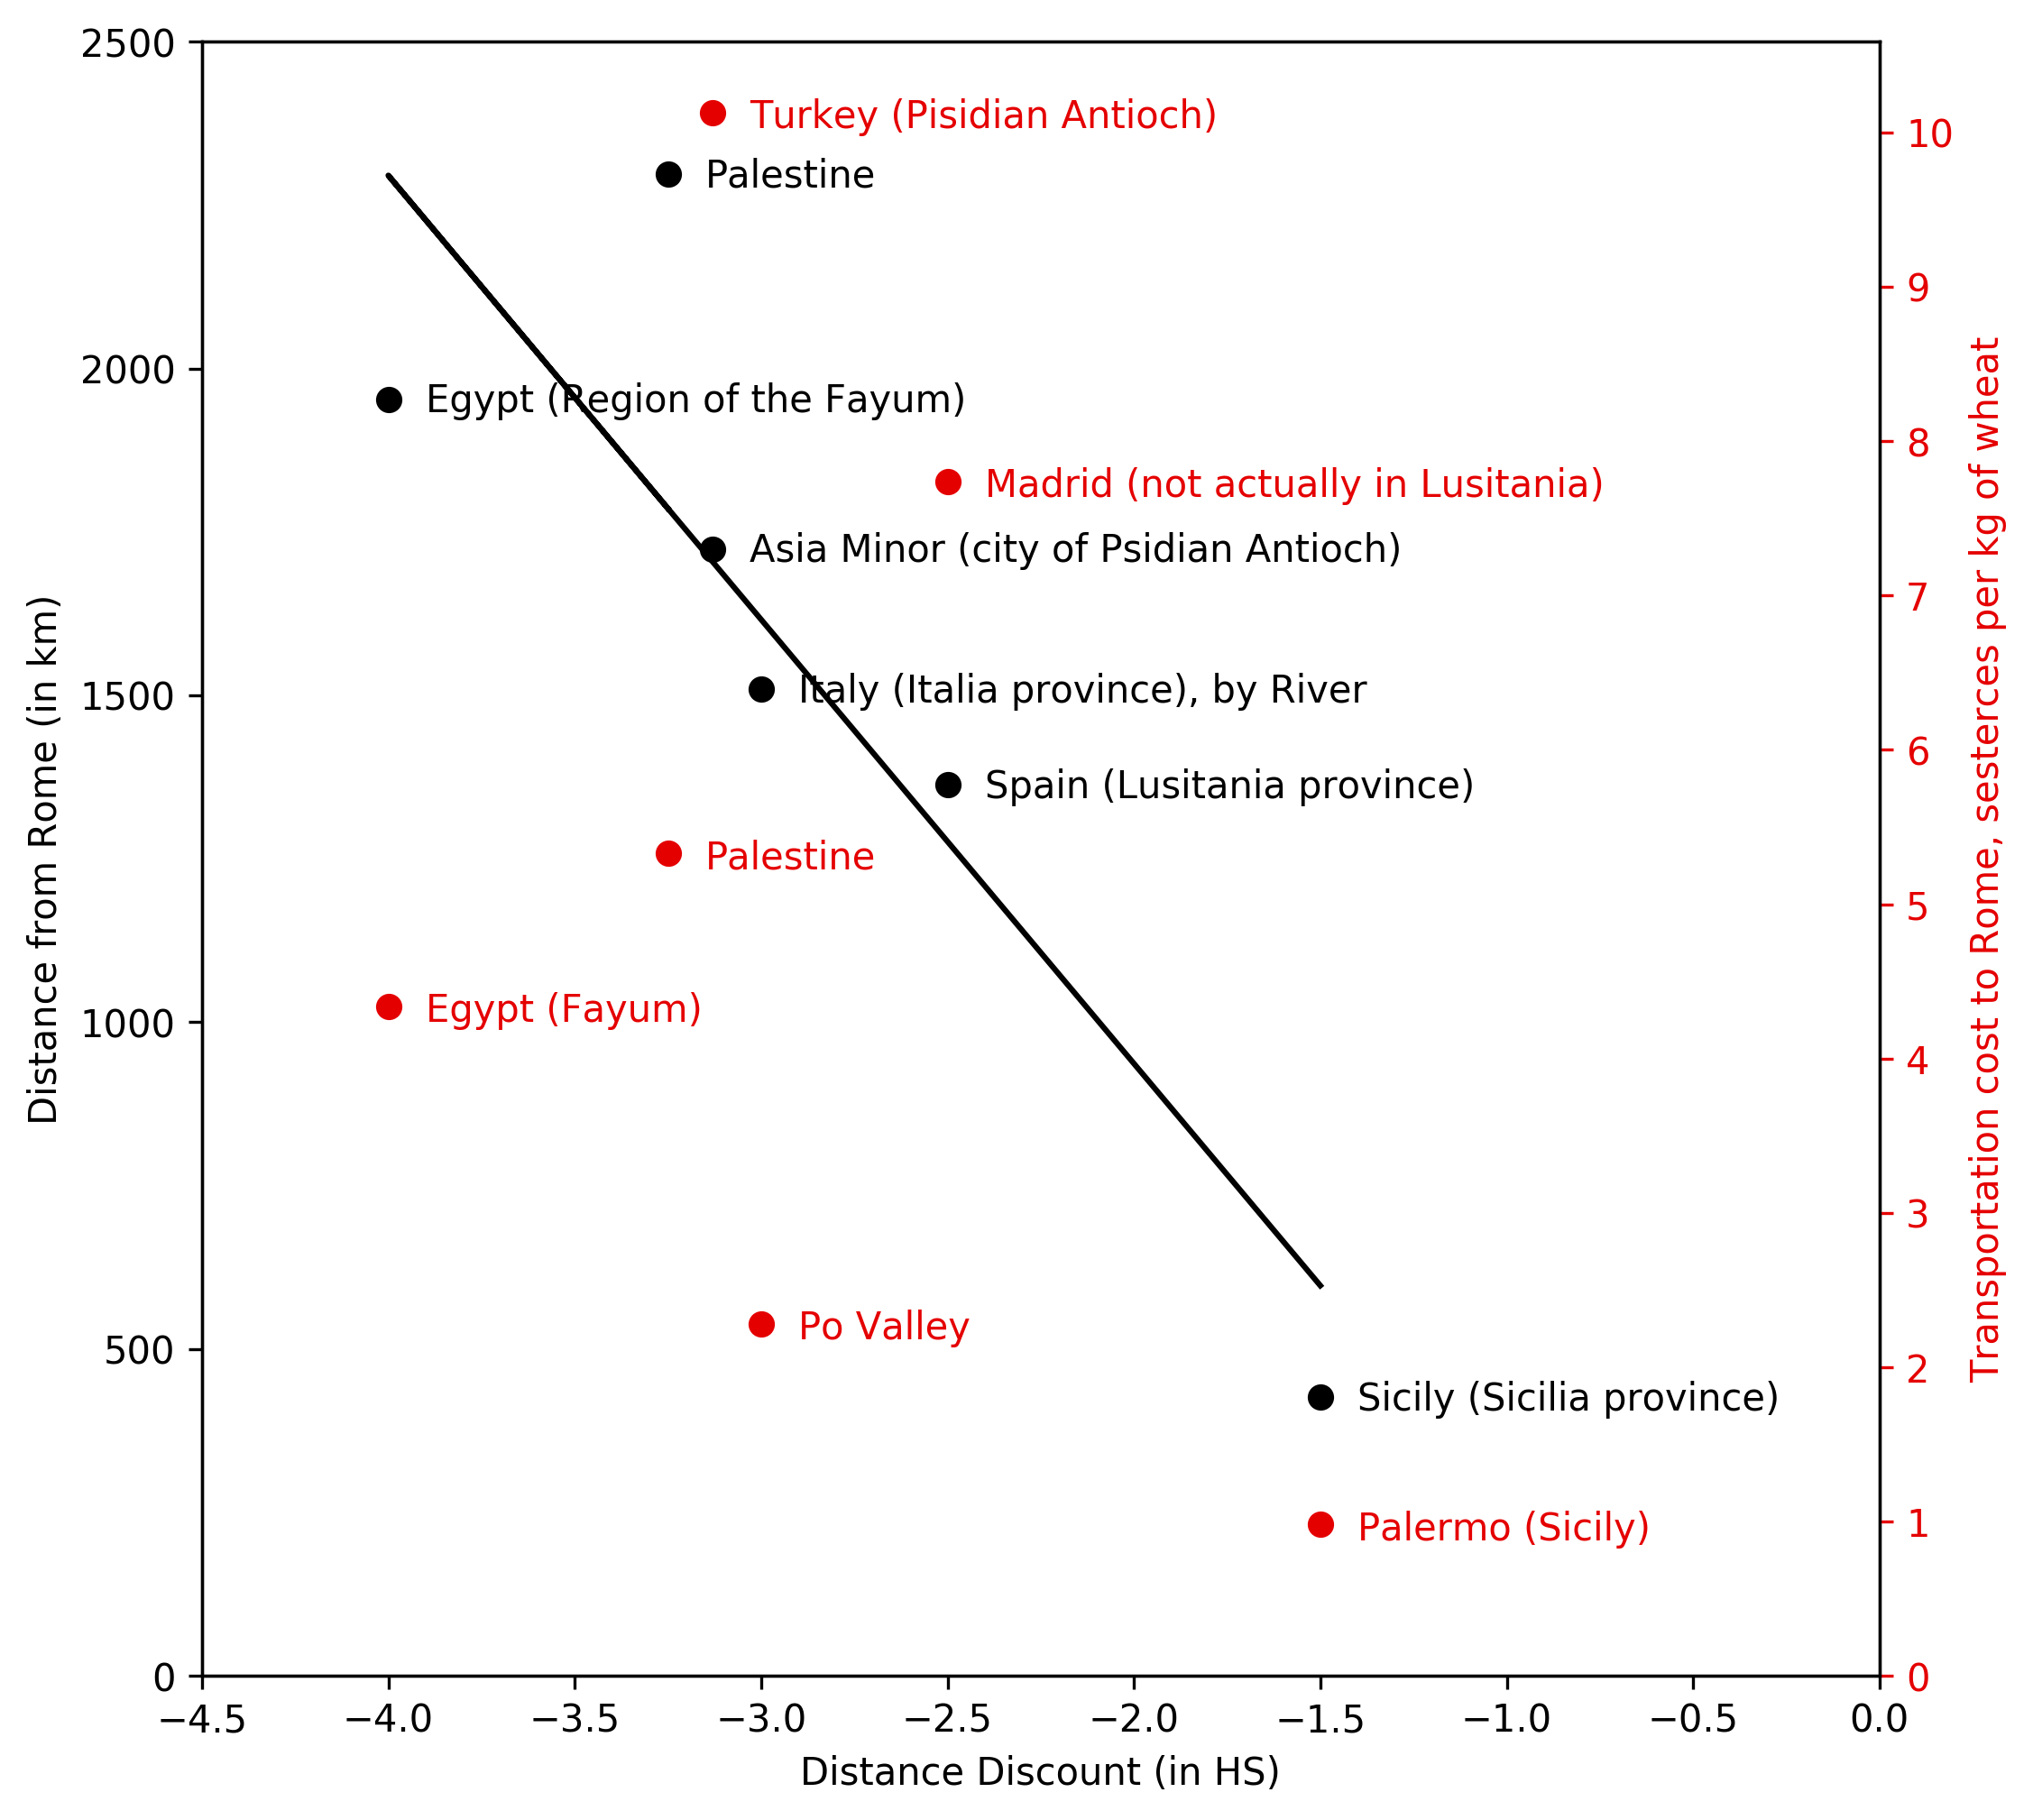

In [9]:
y_rs = df['Transportation cost to Rome, sesterces per kg of wheat']
y_pt = df['Distance (km) from Rome']
x_rs_pt = df['Distance-from-Rome "Discount" (HS)']

plt.figure(dpi=300, figsize=(8,8))
ax2 = plt.subplot()

# plot PT data
l2 = ax2.scatter(x_rs_pt, y_pt, facecolor=pt_color)
for label, x, y in zip(df['Region (PT)'], x_rs_pt, y_pt):
    ax2.annotate(label, (x+shift, y-20), color=pt_color)
m, b = np.polyfit(x_rs_pt, y_pt, 1)
plt.plot(x_rs_pt, m*x_rs_pt+b, color=pt_color)
ax2.set_ylabel('Distance from Rome (in km)')
ax2.tick_params(axis='y', colors=pt_color)
ax2.set_yticks(np.arange(0, 2501, 500))
ax2.set_xlabel('Distance Discount (in HS)')

# plot RS data
ax1 = ax2.twinx()
l1 = ax1.scatter(x_rs_pt, y_rs, facecolor=rs_color)
for label, x, y in zip(df['Region (RS)'], x_rs_pt, y_rs):
    ax1.annotate(label, (x+shift, y-0.1), color=rs_color)
ax1.set_ylabel('Transportation cost to Rome, sesterces per kg of wheat', color=rs_color)
ax1.tick_params(axis='y', colors=rs_color)
ax1.set_yticks(np.arange(0, 11, 1))

plt.xlim(-4.5, 0)
plt.show()

## Solution 4: Keep the original marker colors and shapes, but individually shift each label enough to not overlap with other labels.

I can definitely give this a try if it seems like the best option!